In [1]:
from vcat import ImageCube
import glob

useDIFMAP=True
difmap_path="/usr/local/difmap/uvf_difmap_2.5g/"

Thank you for using VCAT. Have fun with VLBI!
If you are using this package please cite VCAT Team et al. 2025 ....


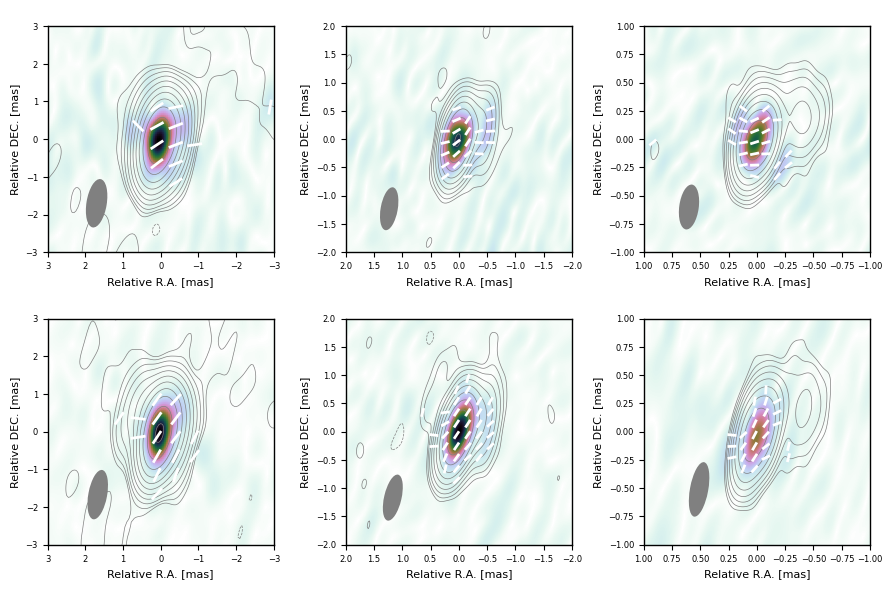

In [2]:
#Let's load some full polarization test data
fits_files=glob.glob("../dataset_example/0235+164/**/*.icn.fits",recursive=True)
uvf_files=glob.glob("../dataset_example/0235+164/**/*.uvf",recursive=True)
stokes_q_files=glob.glob("../dataset_example/0235+164/**/*.qcn.fits",recursive=True)
stokes_u_files=glob.glob("../dataset_example/0235+164/**/*.ucn.fits",recursive=True)

#import files
im_cube=ImageCube().import_files(fits_files=fits_files,uvf_files=uvf_files,stokes_q_files=stokes_q_files,stokes_u_files=stokes_u_files,
                                difmap_path=difmap_path)

#plot it
im_cube.plot(plot_mode="lin_pol",plot_evpa=True,mode="freq",xlim=[[3,-3],[2,-2],[1,-1]],ylim=[[-3,3],[-2,2],[-1,1]])

common beam calculated: [1.3433452632393614, 0.5053164887316406, -12.800451727816428]
common beam calculated: [0.8531843925780541, 0.2862325566545742, -15.378206164314056]
common beam calculated: [0.4932275536997565, 0.16522687930057275, -12.192941079812956]
will apply shift (x,y): [0.0 : 0.0] mas
will apply shift (x,y): [0.0 : 0.0] mas
will apply shift (x,y): [0.0 : 0.0] mas
will apply shift (x,y): [0.0 : 0.0] mas
will apply shift (x,y): [0.0 : 0.0] mas
will apply shift (x,y): [-0.02000000004727464 : 0.01000000002363732] mas


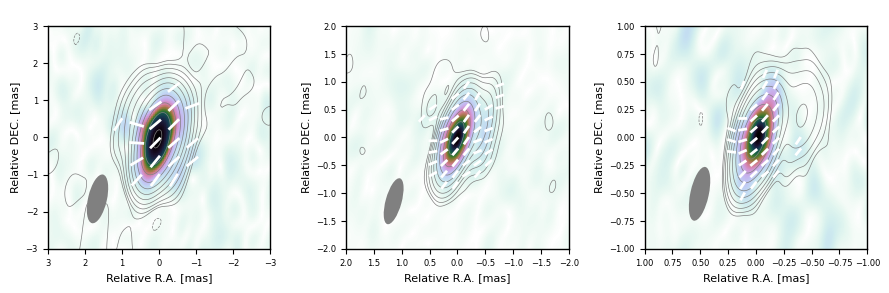

In [4]:
#Let's restore them with a common beam per frequency and align them on the brightest pixel
im_cube=im_cube.align(method="brightest",mode="freq",useDIFMAP=useDIFMAP)

#and then perform the stacking (stokes I and polarization will be stacked)
stack=im_cube.stack(mode="freq")

#now we will plot the stacked images
stack.plot(plot_mode="lin_pol",plot_evpa=True,mode="freq",xlim=[[3,-3],[2,-2],[1,-1]],ylim=[[-3,3],[-2,2],[-1,1]])

In [8]:
#The stacked ImageCube/ImageData behaves like a usual ImageData object, but without corresponding .uvf file
#The observing epoch for a stacked image is arbitrary and therefore automatically set to 3000-01-01
print(stack)

#In general you can continue with the stacked image to perform ridgeline fitting or other analysis steps

ImageCube for source 0235+164 with 3 frequencies and 1 epoch.
Frequencies [GHz]: 15 GHz, 24 GHz, 43 GHz
Epoch: 3000-01-01
